In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploration des données 

In [334]:
df = pd.read_csv("breast cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# La description des variables 

diagnosis" est la variable cible qui indique si une tumeur est maligne (M) ou bénigne (B).

"radius_mean" décrit la moyenne du rayon de la tumeur.

"texture_mean" décrit la moyenne de la texture de la tumeur.

"perimeter_mean" décrit la moyenne du périmètre de la tumeur.

"area_mean" décrit la moyenne de la surface de la tumeur.

smoothness_mean" décrit la moyenne de la douceur de la surface de la tumeur

"compactness_mean" décrit la moyenne de la compacité de la tumeur

"concavity_mean" décrit la moyenne de la concavité de la tumeur

"concave points_mean" décrit la moyenne des points concaves de la tumeur

"symmetry_mean" décrit la moyenne de la symétrie de la tumeur

"fractal_dimension_mean" décrit la moyenne de la dimension fractale de la tumeur

"radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se","concave points_se" et "symmetry_se" décrivent respectivement les écarts-types des variables correspondantes.

On fait une description sur le valeur cible qui est dignosis

Dans le contexte de la classification des tumeurs, "malin" désigne une tumeur maligne, qui est une tumeur qui peut se propager dans d'autres parties du corps et causer des dommages importants. Les tumeurs malignes peuvent également se reproduire et envahir les tissus sains environnants.

"Bénigne", d'autre part, désigne une tumeur bénigne qui ne se propage pas et ne cause généralement pas de dommages importants. Les tumeurs bénignes sont généralement plus faciles à traiter et ont un taux de mortalité plus faible que les tumeurs malignes.

Dans l'ensemble de données Breast Cancer Wisconsin, la tâche de classification consiste à prédire si une tumeur est maligne ou bénigne en utilisant des caractéristiques mesurées sur des échantillons de tumeurs. Les modèles d'apprentissage automatique peuvent être utilisés pour apprendre à faire cette prédiction en s'entraînant sur des données d'entraînement et en testant leur performance sur des données de test.

# Analyse descriptive 

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [336]:
df.describe().T.head(10) # la description du dataframe

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.00000,869218.00000,906024.00000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.98100,11.70000,13.37000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.71000,16.17000,18.84000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.79000,75.17000,86.24000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.50000,420.30000,551.10000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.05263,0.08637,0.09587,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.01938,0.06492,0.09263,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.00000,0.02956,0.06154,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.00000,0.02031,0.03350,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.10600,0.16190,0.17920,1.957000e-01,3.040000e-01


# Preparation et nettoyage de donnees 

In [337]:
df.drop(df.columns[df.columns.str.contains('id|Unnamed:')], axis=1, inplace=True)
 # On supprime les variables Unnamed Id car 

In [338]:
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [339]:
#On verifie s'il y'a des données manquantes 
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [340]:
df.describe(include='all').T.assign(valeurs_manquantes=df.isna().sum()).head(10)
# Ajoutes les valeurs manquantes dans le tebleau de lascrption de notre dataset 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,valeurs_manquantes
diagnosis,569,2,B,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
radius_mean,569.0,NaN,NaN,NaN,14.127292,3.524049,6.981,11.7,13.37,15.78,28.11,0
texture_mean,569.0,NaN,NaN,NaN,19.289649,4.301036,9.71,16.17,18.84,21.8,39.28,0
perimeter_mean,569.0,NaN,NaN,NaN,91.969033,24.298981,43.79,75.17,86.24,104.1,188.5,0
area_mean,569.0,NaN,NaN,NaN,654.889104,351.914129,143.5,420.3,551.1,782.7,2501.0,0
smoothness_mean,569.0,NaN,NaN,NaN,0.09636,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634,0
compactness_mean,569.0,NaN,NaN,NaN,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454,0
concavity_mean,569.0,NaN,NaN,NaN,0.088799,0.07972,0.0,0.02956,0.06154,0.1307,0.4268,0
concave points_mean,569.0,NaN,NaN,NaN,0.048919,0.038803,0.0,0.02031,0.0335,0.074,0.2012,0
symmetry_mean,569.0,NaN,NaN,NaN,0.181162,0.027414,0.106,0.1619,0.1792,0.1957,0.304,0


In [341]:
# C'est fonction nous permet de savoir s'il y'a une variable avec des  chaines de caracteraires pour faire l'encodage a ce dernier 
def String_variables(data):
    str_variables = []
# boucle pour parcourir les variables de df
    for col in data.iloc[0:0]:
        # vérifier si la variable est de type object (chaîne de caractères)
        if data[col].dtype == object:
            # ajouter la variable au tableau
            str_variables.append(col)

    return str_variables
String_variables(df)


['diagnosis']

In [342]:
# On voit que diagnosis a des chaines de carateres comme valeurs
# Donc une verifie le valeur de diagnosis 

nbre = df['diagnosis'].nunique()
    
print(f"Diagnosis a {nbre} valeurs differentes ")
    

Diagnosis a 2 valeurs differentes 


In [343]:
#on essaye de valeur 
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [344]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [345]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [346]:
df.describe(include='all').T.assign(valeurs_manquantes=df.isna().sum()).head(10)

,count,mean,std,min,25%,50%,75%,max,valeurs_manquantes
diagnosis,569.0,0.372583,0.483918,0.00000,0.00000,0.00000,1.0000,1.0000,0
radius_mean,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100,0
texture_mean,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800,0
perimeter_mean,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000,0
area_mean,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000,0
smoothness_mean,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634,0
compactness_mean,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454,0
concavity_mean,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.1307,0.4268,0
concave points_mean,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.0740,0.2012,0
symmetry_mean,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.1957,0.3040,0


In [347]:
df.corr()['diagnosis'][:-1].sort_values() 
    


smoothness_se            -0.067016
fractal_dimension_mean   -0.012838
texture_se               -0.008303
symmetry_se              -0.006522
fractal_dimension_se      0.077972
concavity_se              0.253730
compactness_se            0.292999
symmetry_mean             0.330499
smoothness_mean           0.358560
concave points_se         0.408042
texture_mean              0.415185
symmetry_worst            0.416294
smoothness_worst          0.421465
texture_worst             0.456903
area_se                   0.548236
perimeter_se              0.556141
radius_se                 0.567134
compactness_worst         0.590998
compactness_mean          0.596534
concavity_worst           0.659610
concavity_mean            0.696360
area_mean                 0.708984
radius_mean               0.730029
area_worst                0.733825
perimeter_mean            0.742636
radius_worst              0.776454
concave points_mean       0.776614
perimeter_worst           0.782914
concave points_worst

In [348]:
df.duplicated().sum() #On vetrifie s'il y'a une 

0

# Visualisation 

<AxesSubplot: xlabel='radius_mean', ylabel='Count'>

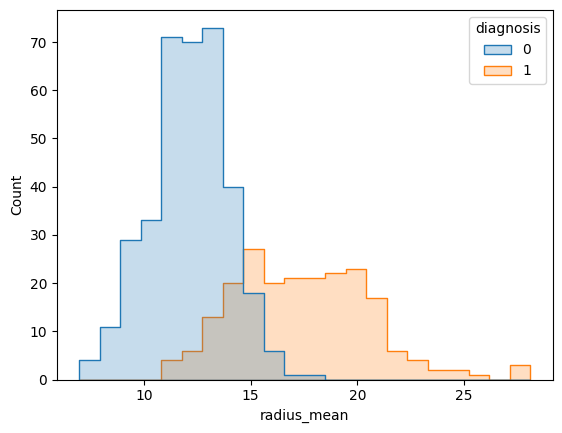

In [349]:
import seaborn as sns

# Utilisez un histogramme pour visualiser les données de la colonne "radius_mean"
sns.histplot(data=df, x="radius_mean", hue="diagnosis", element="step")


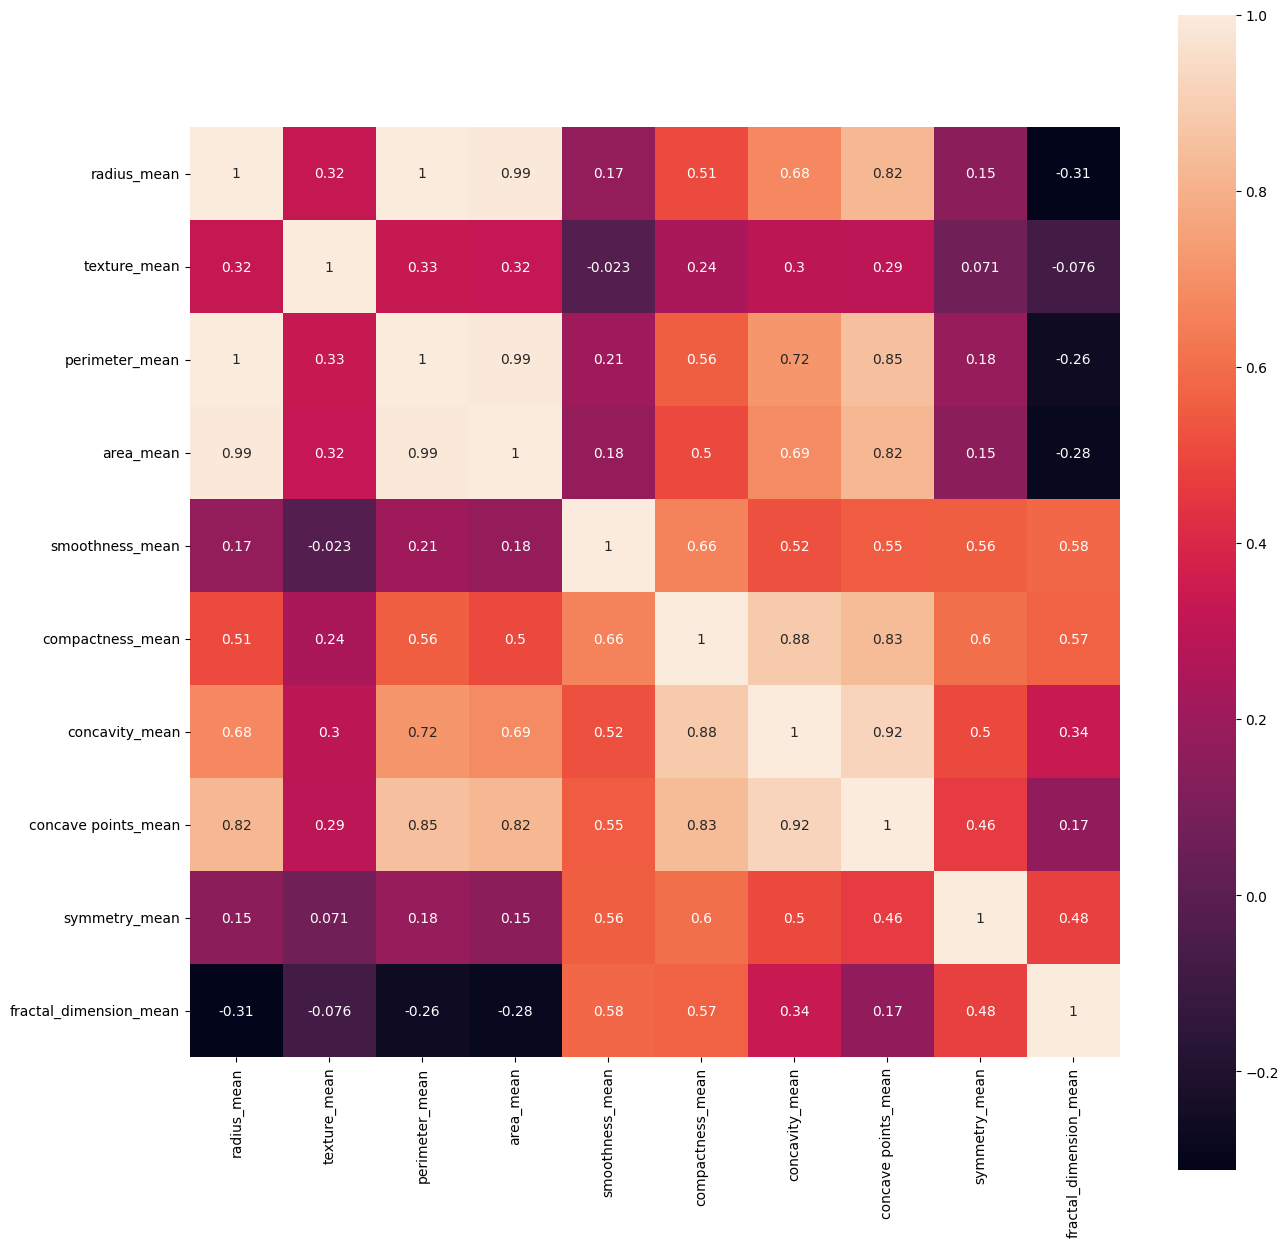

In [350]:

# Mapping e 
features_mean = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
plt.figure(figsize=(15,15))
heat = sns.heatmap(df[features_mean].corr(), vmax=1, square=True, annot=True)

Séparation de l'ensemble de données en deux catégories : maligne et bénigne.

In [351]:
import plotly.express as px

fig = px.scatter(df, x='perimeter_mean', y='texture_mean', color='diagnosis',
                 title='Diagramme de dispersion de radius_mean et texture_mean')
fig.show()


L'objectif de cette visualisation est de montrer la relation entre les variables radius_mean et texture_mean et la variable cible diagnosis
. En particulier, cela permet de voir si les valeurs de ces variables sont différentes entre les tumeurs malignes et bénignes.
 Ainsi, cette visualisation peut aider à identifier les caractéristiques 
 qui sont les plus discriminantes pour distinguer les deux types de tumeurs.


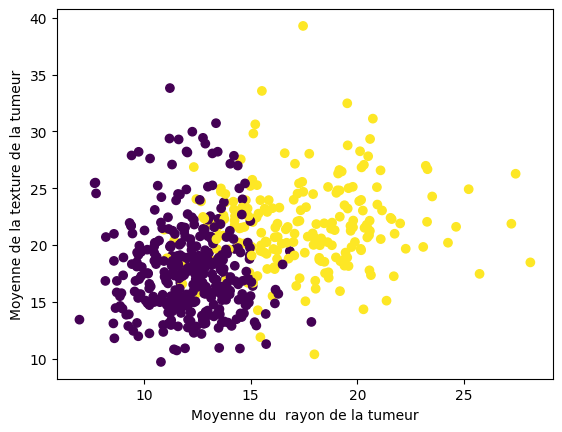

In [352]:
import matplotlib.pyplot as plt

# Utilisez un scatter plot pour visualiser les données de la colonne "radius_mean" et "texture_mean"
print("L'objectif de cette visualisation est de montrer la relation entre les variables radius_mean et texture_mean et la variable cible diagnosis\n. En particulier, cela permet de voir si les valeurs de ces variables sont différentes entre les tumeurs malignes et bénignes.\n Ainsi, cette visualisation peut aider à identifier les caractéristiques \n qui sont les plus discriminantes pour distinguer les deux types de tumeurs.")
plt.scatter(data=df, x="radius_mean", y="texture_mean", c="diagnosis")
plt.xlabel("Moyenne du  rayon de la tumeur")
plt.ylabel("Moyenne de la texture de la tumeur")
plt.show()

C:\Users\cleme\AppData\Local\Temp\ipykernel_4488\2923635080.py:8: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

C:\Users\cleme\AppData\Local\Temp\ipykernel_4488\2923635080.py:8: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

C:\Users\cleme\AppData\Local\Temp\ipykernel_4488\2923635080.py:8: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

C:\Users\cleme\AppData\Local\Temp\ipykernel_4488\2923635080.py:8: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

C:\Users\cleme\AppData\Local\Temp\ipykernel_4488\2923635080.py:8: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

C:\Users\cleme\AppData\Local\Temp\ipykernel_4488\2923635080.py:8: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

C:\Users\cleme\AppData\Local\Temp\ipykernel_4488\2923635080.py:8: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

C:\Users\cleme\AppDa

<Figure size 640x480 with 0 Axes>

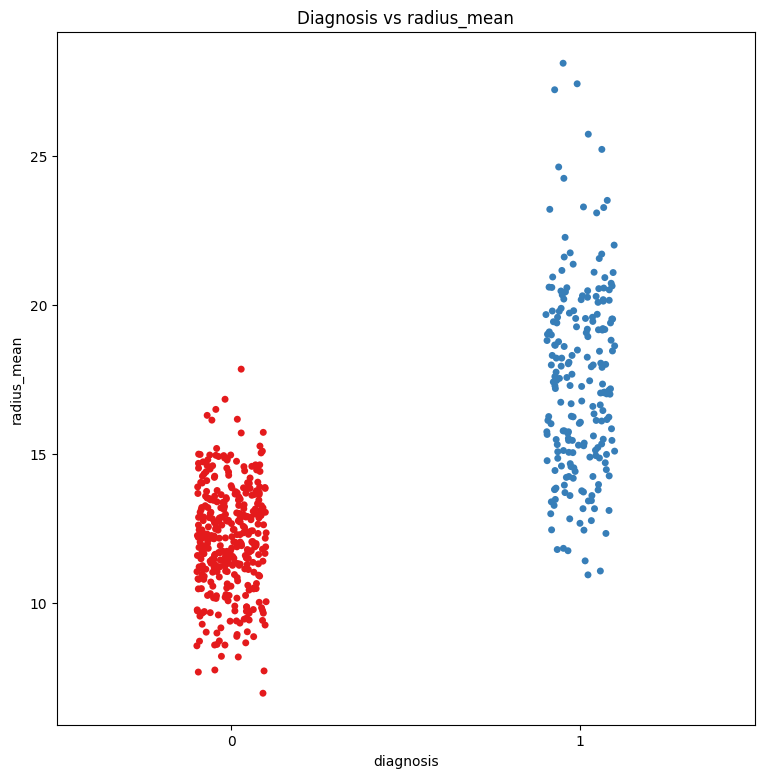

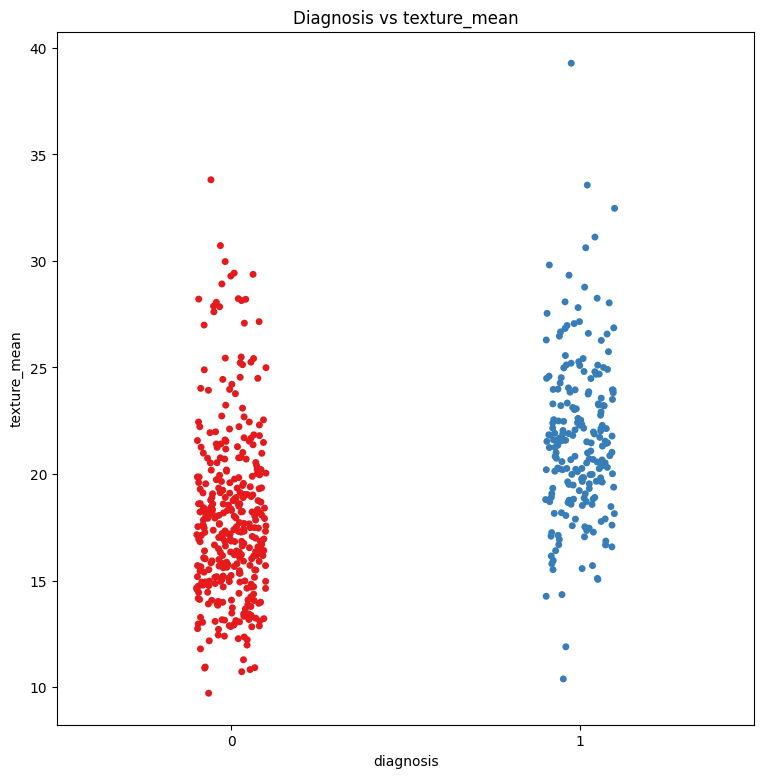

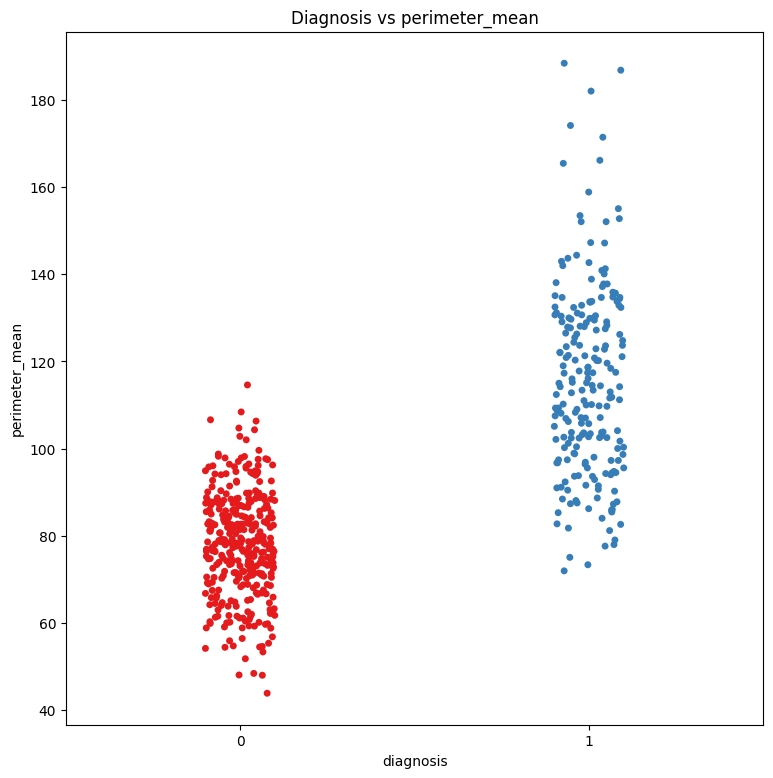

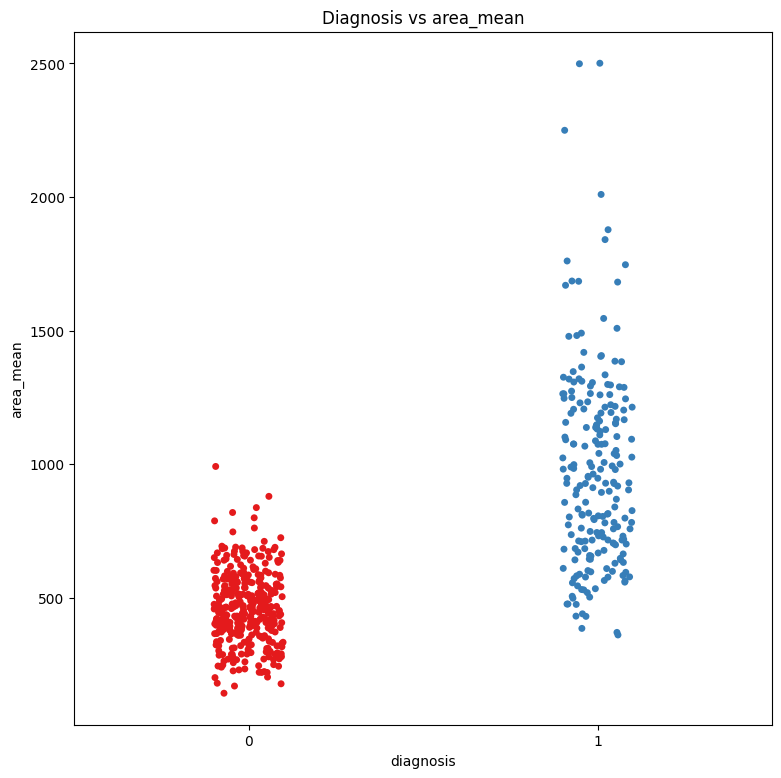

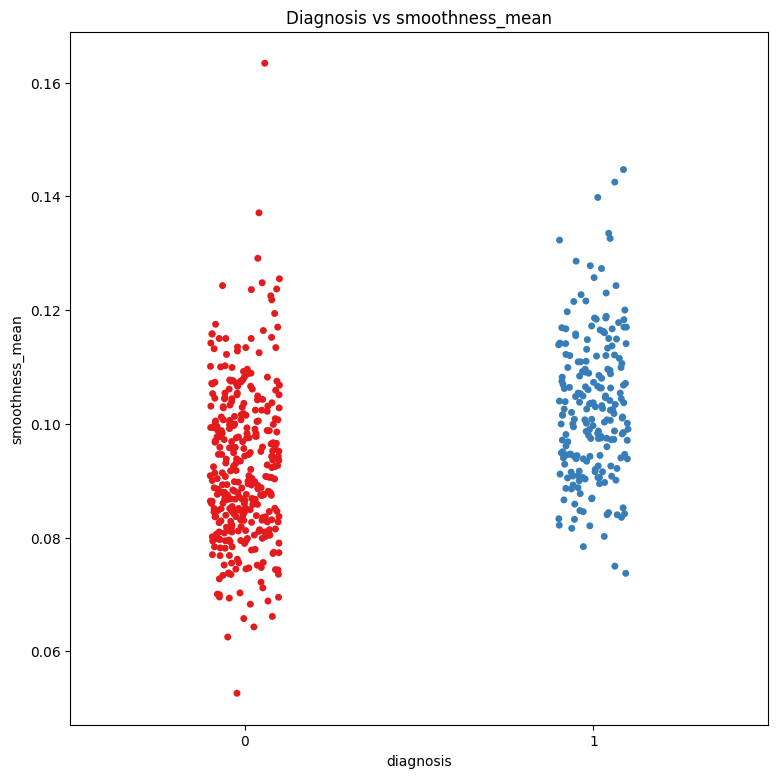

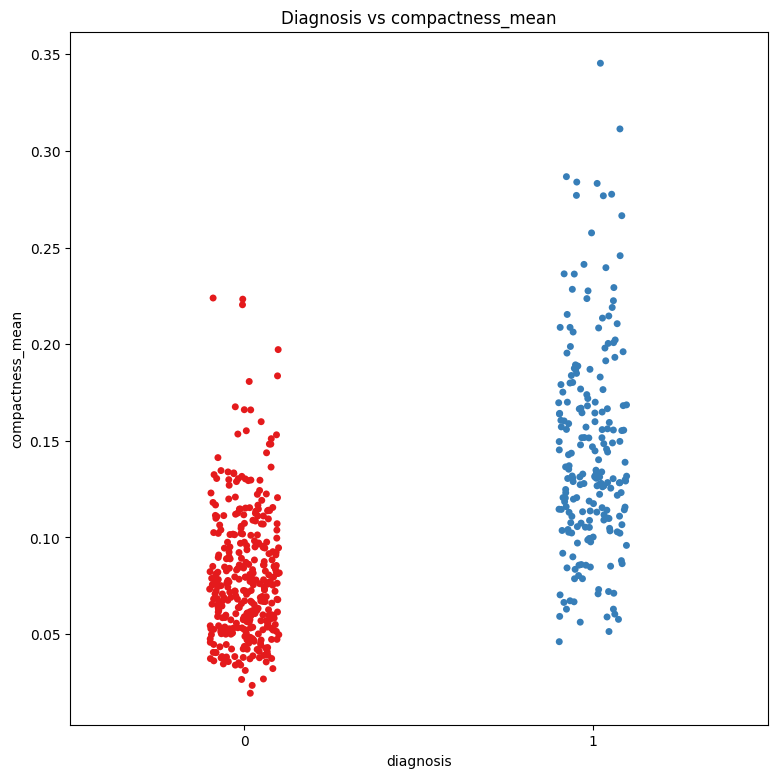

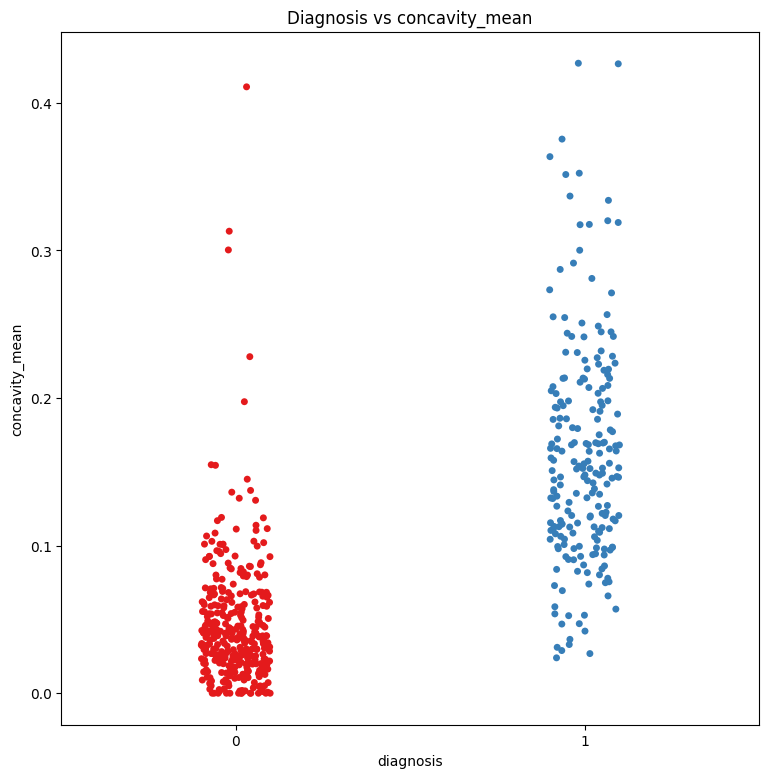

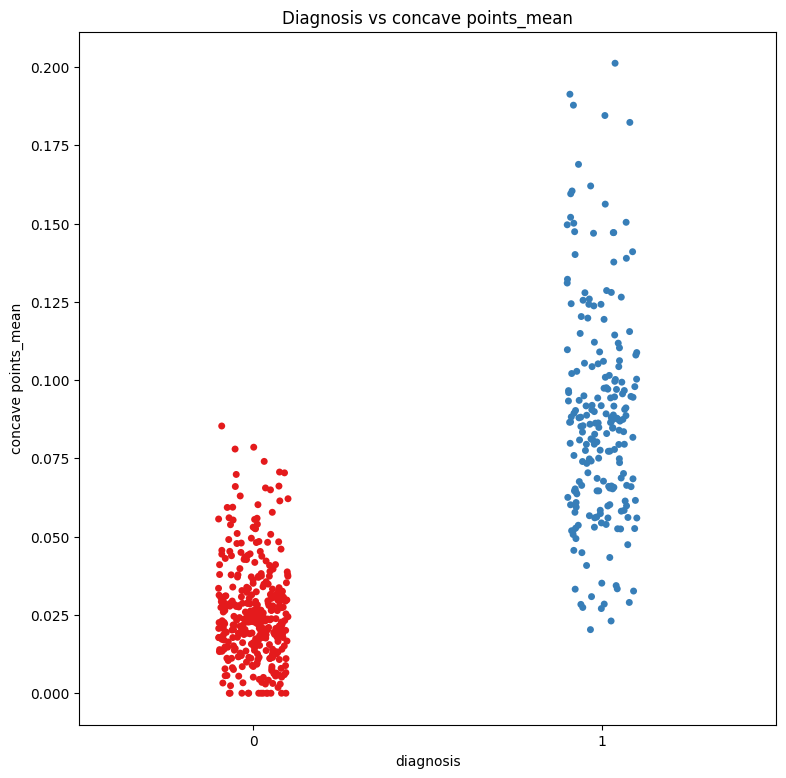

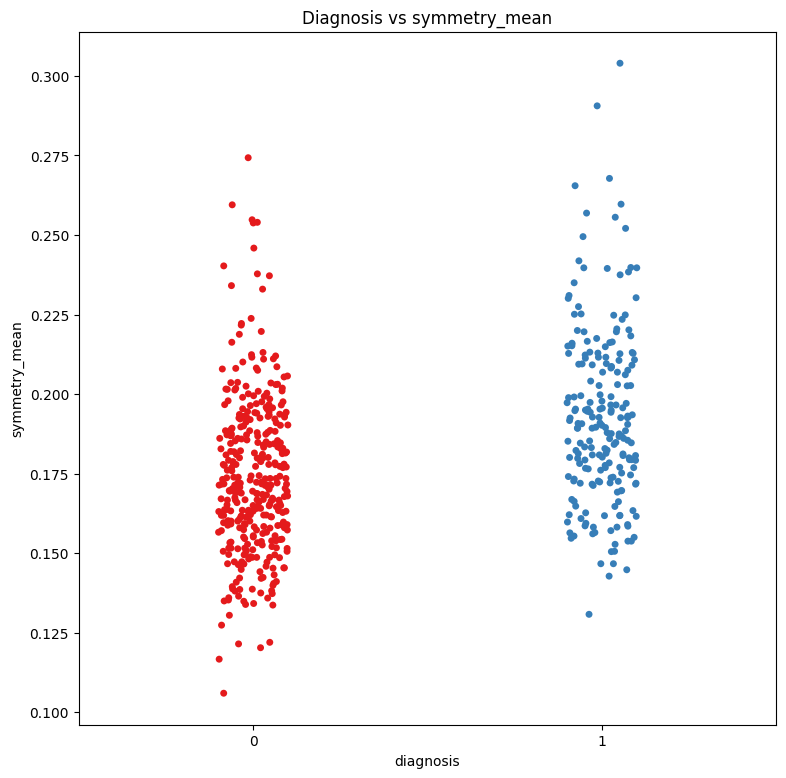

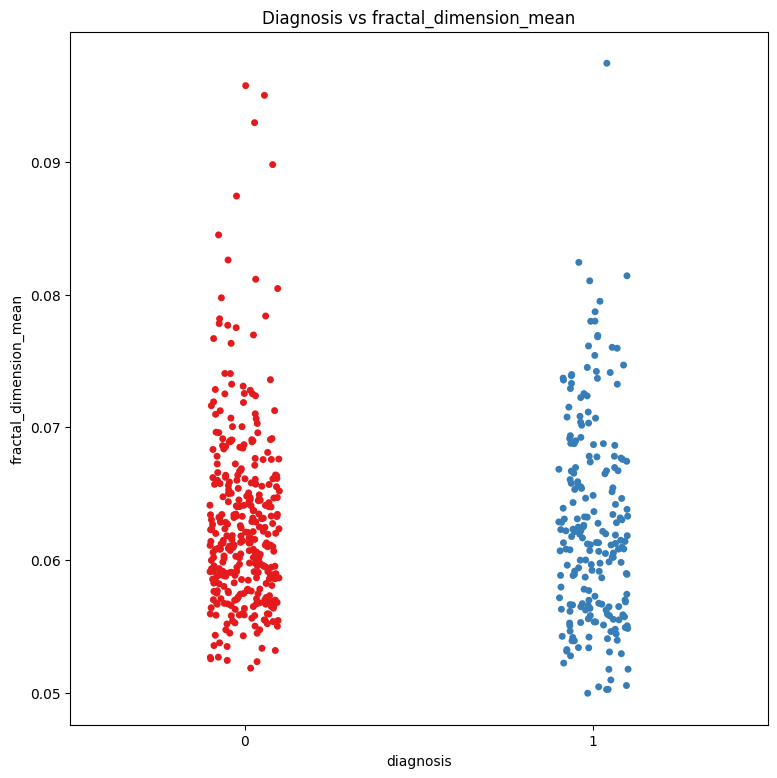

In [353]:
# on fait une presentation de chaque variable en fonction du diagnostique pour comprendre l'influence de ces dernieres 

data_drop = df.drop('diagnosis',axis=1)
data_drop = data_drop[features_mean]
for index,columns in enumerate(data_drop.columns):
    plt.figure(index)
    plt.figure(figsize=(9,9))
    sns.stripplot(x='diagnosis', y= columns, data= df, jitter=True, palette = 'Set1');
    plt.title('Diagnosis vs ' + str(columns))

In [354]:
# ACP 

from sklearn import preprocessing
datas = pd.DataFrame(preprocessing.scale(df.iloc[:,1:32]))
datas.columns = list(df.iloc[:,1:32].columns)
datas['diagnosis'] = df['diagnosis']
datas.head()  

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


In [355]:
# Importer les bibliothèques nécessaires
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Séparer les variables cibles et les caractéristiques
X = df.drop(["diagnosis"], axis=1)
y = df["diagnosis"]

# Diviser les données en ensemble d'entraînement et de test

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialiser le modèle de régression logistique
clf = LogisticRegression()



In [357]:
# Entraîner le modèle sur les données d'entraînement
clf.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = clf.predict(X_test)

# Calculer la précision du modèle
acc = accuracy_score(y_test, y_pred)
print("Précision:", acc)


Précision: 0.9473684210526315


c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [358]:


# Fit logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X, y)

# Plot the data points



c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=42)

In [359]:
from sklearn.ensemble import RandomForestClassifier

# Initialiser le modèle
clf = RandomForestClassifier(n_estimators=100)

# Séparer les données en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Entraîner le modèle
clf.fit(X_train, y_train)

# Prédire les classes pour les données de test
y_pred = clf.predict(X_test)

# Calculer l'exactitude
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude:", accuracy)


Exactitude: 0.9912280701754386


In [360]:
from sklearn.svm import SVC

# Initialiser le modèle
clf = SVC()

# Séparer les données en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Entraîner le modèle
clf.fit(X_train, y_train)

# Prédire les classes pour les données de test
y_pred = clf.predict(X_test)

# Calculer l'exactitude
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude:", accuracy)



Exactitude: 0.9473684210526315


# On compare les models 

In [362]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Sélectionner les features et les labels
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Initialiser les modèles
models = [LogisticRegression(),
          KNeighborsClassifier(),
          SVC(),
          DecisionTreeClassifier(),
          RandomForestClassifier()]

# Utiliser la validation croisée pour évaluer les modèles
for model in models:
    scores = cross_val_score(model, X, y, cv=5)
    print(f"Precision  pour {model.__class__.__name__}: {scores.mean():.2f} (+/- {scores.std()*2:.2f})")



c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Precision  pour LogisticRegression: 0.95 (+/- 0.02)
Precision  pour KNeighborsClassifier: 0.93 (+/- 0.04)
Precision  pour SVC: 0.91 (+/- 0.07)
Precision  pour DecisionTreeClassifier: 0.91 (+/- 0.02)
Precision  pour RandomForestClassifier: 0.96 (+/- 0.05)


# On visualise le modeles 

In [365]:
import plotly.graph_objs as go

# Initialize an empty list to store the accuracy scores
scores = []

# Utiliser la validation croisée pour évaluer les modèles
for model in models:
    cv_scores = cross_val_score(model, X, y, cv=5)
    scores.append(cv_scores.mean())

# Create a bar plot using plotly
data = [go.Bar(x=[model.__class__.__name__ for model in models],
            y=scores,
            text=[f'Précision moyenne: {score:.2f}' for score in scores],
            textposition='auto')]

layout = go.Layout(title='La performance des models ',
                   xaxis=dict(title='Modeles '),
                   yaxis=dict(title='Précision '))

fig = go.Figure(data=data, layout=layout)
fig.show()



c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log